In [1]:
import pandas as pd
import math
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

In [2]:
sns.set(style='white')

In [3]:
def get_subplot_dimensions(N, max_columns=None):
    if max_columns is None or N <= max_columns:
        # If max_columns is not specified or N is less than or equal to max_columns,
        # then the number of columns required is equal to N.
        # In this case, the number of rows required is 1.
        return 1, N

    # If N is greater wthan max_columns, we need to calculate the number of rows required.
    rows = math.ceil(N / max_columns)
    cols = max_columns

    return rows, cols

In [4]:
RESULTS_DIR = "/home/kieran/Level5ProjectAudioVAE/src/evaluation/data/metrics"
FIGURES_DIR = "/home/kieran/Level5ProjectAudioVAE/src/evaluation/figures/metrics"

In [5]:
# effects = ['overdrive', 'multiband', 'ambience', 'delay']

In [6]:
cols = ['dafx', 'pesq', 'mrstft']

In [7]:
vctk = pd.read_csv(f"{RESULTS_DIR}/vctk.csv", index_col=0)[cols]
daps = pd.read_csv(f"{RESULTS_DIR}/daps.csv", index_col=0)[cols]
musdb = pd.read_csv(f"{RESULTS_DIR}/musdb18.csv", index_col=0)[cols]

In [8]:
import json

max_cols = 3

effects = ['multiband', 'ambience', 'leslie', 'overdrive', 'flanger', 'dynamics',
       'combo', 'delay', 'ringmod']

dfs = [vctk, daps, musdb]
dataset_names = ["VCTK", "DAPS", "MusDB18"]
metrics = ['mrstft', 'pesq']

rows, cols = get_subplot_dimensions(6, max_columns=max_cols)

palette = sns.color_palette(n_colors=len(effects)).as_hex()
colour_map = {name: palette[i] for i, name in enumerate(effects)}

format_map = {
    'multiband': 'MultiBand',
    'ambience': 'Ambience',
    'leslie': 'Leslie',
    'overdrive': 'Overdrive',
    'flanger': 'Flanger',
    'dynamics': 'Dynamics',
    'combo': 'Combo',
    'delay': 'Delay',
    'ringmod': 'RingMod'
}

large_font = 12
small_font = 10

print(json.dumps(colour_map, indent=4))

{
    "multiband": "#4c72b0",
    "ambience": "#dd8452",
    "leslie": "#55a868",
    "overdrive": "#c44e52",
    "flanger": "#8172b3",
    "dynamics": "#937860",
    "combo": "#da8bc3",
    "delay": "#8c8c8c",
    "ringmod": "#ccb974"
}


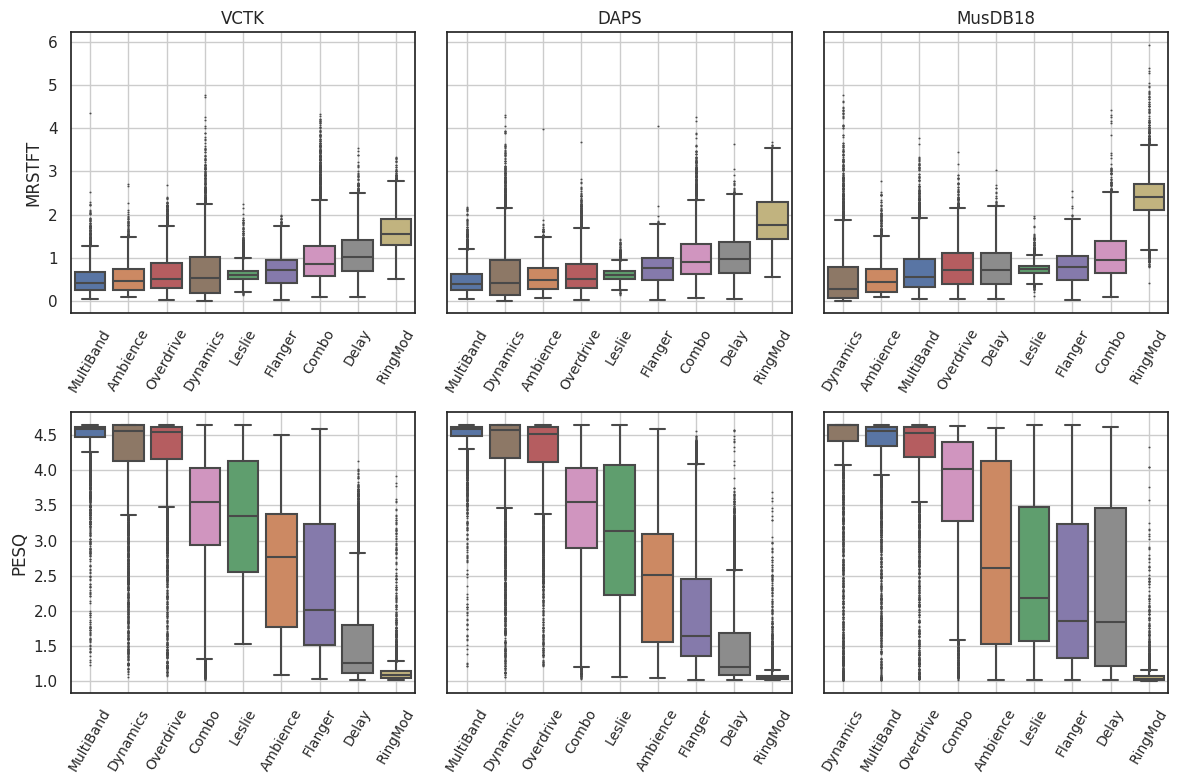

In [10]:
sns.set(style='white')

fig, axs = plt.subplots(rows, cols, figsize=(4*cols,4*rows), sharey='row')

for i in range(6):
    row_idx, col_idx = divmod(i, cols)
    
    df = dfs[col_idx]
    metric = metrics[row_idx]

    if rows == 1:
            current_ax = axs[col_idx]
    elif cols == 1:
        current_ax = axs[row_idx]
    else:
        current_ax = axs[row_idx, col_idx]
    
    if metric == 'mrstft':
        order = df.groupby(by=["dafx"]).median().sort_values('mrstft').index
    elif metric == 'pesq':
        order = df.groupby(by=["dafx"]).median().sort_values('pesq').iloc[::-1].index
        
    my_colours = [colour_map[fx] for fx in order]
    sns.set_palette(my_colours)
    
    sns.boxplot(df, x='dafx', y=metric, ax=current_ax, order=order, fliersize=.5)
    labels = [format_map[x] for x in order]
    current_ax.set_xticklabels(labels, rotation=60, fontsize=small_font)
#     current_ax.set_xticklabels([])
    current_ax.set_xlabel("")
    
    current_ax.yaxis.grid(True) # Hide the horizontal gridlines
    current_ax.xaxis.grid(True) # Show the vertical gridlines
    
    if row_idx == 0:
        current_ax.set_title(dataset_names[col_idx], fontsize=large_font)
        
    if col_idx != 0:
        current_ax.set_ylabel("")
    else:
        current_ax.set_ylabel(metrics[row_idx].upper(), fontsize=large_font)

handles = []
for fx in effects:
    patch = mpatches.Patch(color=colour_map[fx], label=fx.title())
    handles.append(patch)

sns.set()

plt.tight_layout()
# fig.subplots_adjust(bottom=0.2)

# fig.legend(handles=handles, loc="lower center", ncol=5, frameon=False)
plt.savefig(f"{FIGURES_DIR}/metrics.pdf")

In [61]:
low_metrics = [
    'mrstft', # multi-resolution spectrogram error (general perception of similarity)
    'msd', # mel-spectral difference (equalisation similarity)
    'sce', # spectral-centroid error (equalisation similarity)
    'cfe', # crest-factor error (dynamics)
    'rms', # rms energy error (dynamics)
    'lufs' # loudness error (dynamics)
]
high_metrics = [
    'pesq' # perceptual evaluation of speech quality (general perceptual similarity)
] 

In [62]:
vtck_mean = vtck.groupby('dafx').mean().sort_values('mrstft')
lo = list(set(cols).intersection(low_metrics))
hi = list(set(cols).intersection(high_metrics))

(vtck_mean.style.highlight_min(axis=0, props='background-color:yellow;', subset=lo)
         .highlight_max(axis=0, props='background-color:red;', subset=lo)
         .highlight_max(axis=0, props='background-color:yellow;', subset=hi)
         .highlight_min(axis=0, props='background-color:red;', subset=hi))

,pesq,mrstft
dafx,,
multiband,4.450827,0.491711
ambience,2.625376,0.524781
leslie,3.315956,0.621029
overdrive,4.223743,0.639782
flanger,2.386474,0.695547
dynamics,4.206596,0.700966
combo,3.403186,1.054947
delay,1.611228,1.077613
ringmod,1.148126,1.620978


In [145]:
current_ax.get_legend_handles_labels()

([], [])

In [33]:
daps_mean = daps.groupby('dafx').mean()
lo = list(set(cols).intersection(low_metrics))
hi = list(set(cols).intersection(high_metrics))

(daps_mean.style.highlight_min(axis=0, props='background-color:yellow;', subset=lo)
         .highlight_max(axis=0, props='background-color:red;', subset=lo)
         .highlight_max(axis=0, props='background-color:yellow;', subset=hi)
         .highlight_min(axis=0, props='background-color:red;', subset=hi))

,pesq,mrstft
dafx,,
ambience,2.406652,0.545256
combo,3.378133,1.048086
delay,1.533843,1.028197
dynamics,4.209182,0.648123
flanger,2.038658,0.742375
leslie,3.132514,0.606725
multiband,4.485744,0.471675
overdrive,4.213151,0.639211
ringmod,1.097153,1.855569


In [34]:
mus_mean = musdb.groupby('dafx').mean()
lo = list(set(cols).intersection(low_metrics))
hi = list(set(cols).intersection(high_metrics))

(mus_mean.style.highlight_min(axis=0, props='background-color:yellow;', subset=lo)
         .highlight_max(axis=0, props='background-color:red;', subset=lo)
         .highlight_max(axis=0, props='background-color:yellow;', subset=hi)
         .highlight_min(axis=0, props='background-color:red;', subset=hi))

,pesq,mrstft
dafx,,
ambience,2.780129,0.518395
combo,3.688783,1.040168
delay,2.323957,0.765226
dynamics,4.177324,0.554029
flanger,2.339116,0.748175
leslie,2.518093,0.727474
multiband,4.272136,0.724658
overdrive,4.221102,0.796537
ringmod,1.090464,2.410170
